# Pandas

## importing

In [1]:
import pandas as pd
import numpy as np
pd.__version__

'2.2.3'

## Series
a series is like a column in a table

In [2]:
data = pd.Series(np.array([1,2,4,5,6,7,8,9,10], dtype=np.int8), name="data")
data

0     1
1     2
2     4
3     5
4     6
5     7
6     8
7     9
8    10
Name: data, dtype: int8

In [3]:
data[data > 5]

4     6
5     7
6     8
7     9
8    10
Name: data, dtype: int8

In [4]:
data2 = pd.Series(
    np.array([30,10,30,20,20], dtype=np.int8),
    index=["egypt","us","uk","france","germany"],
    name="Countries data"
)
data2

egypt      30
us         10
uk         30
france     20
germany    20
Name: Countries data, dtype: int8

In [5]:
data2[data2 > 25]

egypt    30
uk       30
Name: Countries data, dtype: int8

## DataFrame
data frame is like a table

In [6]:
df = pd.DataFrame({
    "name": ["ahmed", "mohamed", "ali", "sara", "mohamed"],
    "age": [30, 25, 35, 20, 25],
    "country": ["Egypt", "US", "UK", "France", "Germany"],
    "salry": [3000, 1500, 3500, 2500, 2500],
    "section": ["IT", "Full Stack", "DevOps", "DataBase", "Team Leader"],
    "langueses": ["python", "java", "c++", "python", "java"],
})

df

,name,age,country,salry,section,langueses
0,ahmed,30,Egypt,3000,IT,python
1,mohamed,25,US,1500,Full Stack,java
2,ali,35,UK,3500,DevOps,c++
3,sara,20,France,2500,DataBase,python
4,mohamed,25,Germany,2500,Team Leader,java


In [7]:
df['salry'] > 2500

0     True
1    False
2     True
3    False
4    False
Name: salry, dtype: bool

In [8]:
df.loc[df['salry'] > 2500, ['name', 'country']]

,name,country
0,ahmed,Egypt
2,ali,UK


In [9]:
df[['salry per day', 'langueses']] = pd.Series([round(df['salry'] / 30, 2), df['langueses'].str.title()])
df

,name,age,country,salry,section,langueses,salry per day
0,ahmed,30,Egypt,3000,IT,Python,100.00
1,mohamed,25,US,1500,Full Stack,Java,50.00
2,ali,35,UK,3500,DevOps,C++,116.67
3,sara,20,France,2500,DataBase,Python,83.33
4,mohamed,25,Germany,2500,Team Leader,Java,83.33


## Reading CSV file

In [10]:
df = pd.read_csv("data.csv", header=None)
df.columns = ['TimeStamp', 'Price']
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df.set_index('TimeStamp', inplace=True)
df

ValueError: time data "?" doesn't match format "%Y-%m-%d %H:%M:%S", at position 3. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df.loc['2023-1-2 01']

Price    125.5
Name: 2023-01-02 01:00:00, dtype: float64

### shortcut

MIN: 0.5
AVG: 110.77143
MAX: 250.1


count     28.000000
mean     110.771431
std       52.707825
min        0.500000
25%       87.575001
50%      119.049999
75%      138.949997
max      250.100006
Name: Price, dtype: float64

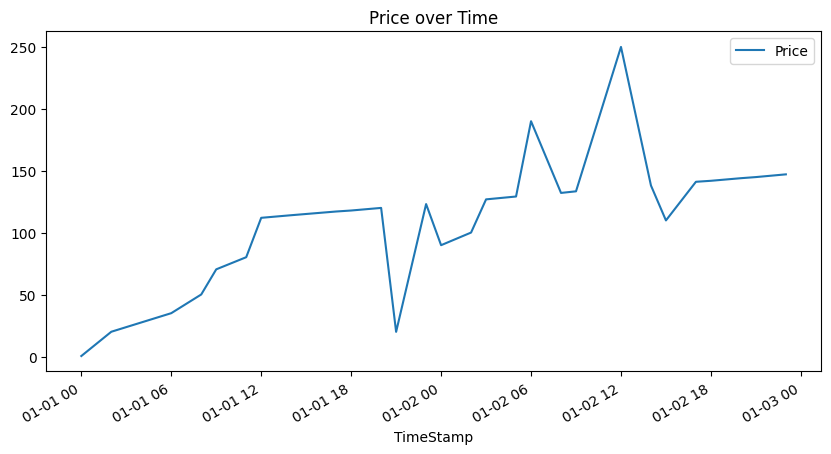

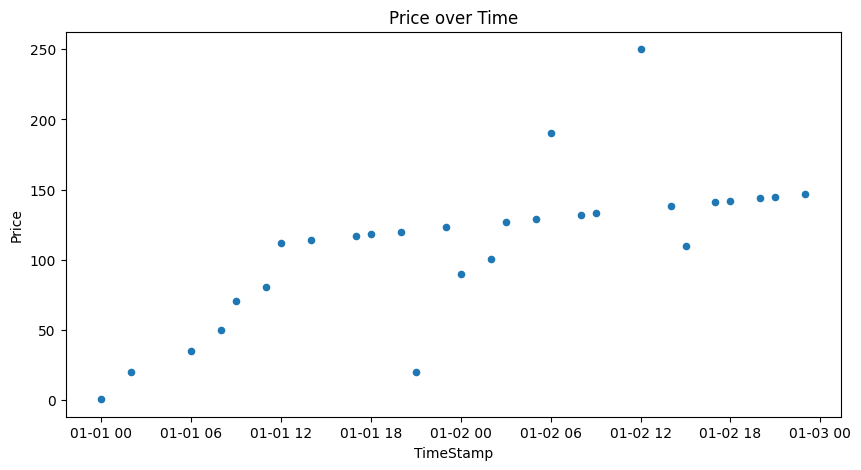

In [11]:
df = pd.read_csv(
    "data.csv", 
    header=None,
    # index_col=0,
    parse_dates=[0],
    na_values=['?'],
    names=['TimeStamp', 'Price'],
    dtype={"Price": 'float32'}
)
df.dropna(inplace=True)
df.plot(y='Price', x='TimeStamp', xlabel='TimeStamp', kind='line', title="Price over Time", figsize=(10, 5))
df.plot(y='Price', x='TimeStamp', xlabel='TimeStamp', kind='scatter', title="Price over Time", figsize=(10, 5))
print("MIN:", df['Price'].min())
print("AVG:", df['Price'].mean())
print("MAX:", df['Price'].max())
df['Price'].describe()

## Test with real example

In [166]:
df = pd.read_csv(
    './data/Orders.csv',
    parse_dates=['Order Date'],
    date_format={"Order Date": '%d/%m/%Y'},
    index_col=0,
    dtype={
        "Lat": "float32",
        "Lng": "float32",
        "Quantity": "int8",
        "Unit Price": "int16",
        "Discount": "float32",
        "Total Cost": "float32",
    },
)
df.drop(columns=['Lat', 'Lng', 'SalesPerson ID'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    20000 non-null  datetime64[ns]
 1   Day           20000 non-null  object        
 2   Country       20000 non-null  object        
 3   City          20000 non-null  object        
 4   Full Name     20000 non-null  object        
 5   Category      20000 non-null  object        
 6   Sub Category  20000 non-null  object        
 7   Item          20000 non-null  object        
 8   Quantity      20000 non-null  int8          
 9   Unit Price    20000 non-null  int16         
 10  Discount      20000 non-null  float32       
 11  Total Cost    20000 non-null  float32       
 12  Status        20000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float32(2), int16(1), int8(1), object(7)
memory usage: 1.6+ MB


In [167]:
df.head()

,Order Date,Day,Country,City,Full Name,Category,Sub Category,Item,Quantity,Unit Price,Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,
1,2023-01-01,Mon,Syria,homs,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",4,999,38.361599,891.907227,False
2,2023-01-01,Tue,Saudi Arabia,riyadh,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,3,1199,517.968018,302.148010,True
3,2023-01-01,Tue,Saudi Arabia,riyadh,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,4,1299,883.320007,831.359985,True
4,2023-01-01,Mon,United Arab Emirates,abu dhabi,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,6,199,33.312599,129.548996,True
5,2023-01-01,Wed,USA,washington,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,4,129,11.261700,111.365700,True


In [168]:
df.insert(11, 'Price After Discount', df['Total Cost'] - df['Discount'], allow_duplicates=False)
df

,Order Date,Day,Country,City,Full Name,Category,Sub Category,Item,Quantity,Unit Price,Discount,Price After Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,,
1,2023-01-01,Mon,Syria,homs,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",4,999,38.361599,853.545654,891.907227,False
2,2023-01-01,Tue,Saudi Arabia,riyadh,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,3,1199,517.968018,-215.820007,302.148010,True
3,2023-01-01,Tue,Saudi Arabia,riyadh,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,4,1299,883.320007,-51.960022,831.359985,True
4,2023-01-01,Mon,United Arab Emirates,abu dhabi,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,6,199,33.312599,96.236397,129.548996,True
5,2023-01-01,Wed,USA,washington,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,4,129,11.261700,100.104004,111.365700,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,2023-09-01,Tue,Morocco,casablanca,Ahmad Iad,Gaming Console,Sony PlayStation,PlayStation 4 Pro,4,399,150.941696,27.092102,178.033798,True
19997,2023-09-01,Tue,Syria,homs,Ali Kiali,Smartwatch,Fossil Gen,Fossil Gen 6,3,299,398.268005,-182.988007,215.279999,True
19998,2023-09-01,Wed,USA,las vegas,Husayn Salayk,Gaming Console,Sony PlayStation,PlayStation 2,5,99,15.364800,41.292900,56.657700,True


In [169]:
df.insert(4, 'First name', df['Full Name'].str.split(' ', expand=True)[0])
df.insert(5, 'Last name', df['Full Name'].str.split(' ', expand=True)[1])
df

,Order Date,Day,Country,City,First name,Last name,Full Name,Category,Sub Category,Item,Quantity,Unit Price,Discount,Price After Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,,,,
1,2023-01-01,Mon,Syria,homs,Lina,Alrrashid,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",4,999,38.361599,853.545654,891.907227,False
2,2023-01-01,Tue,Saudi Arabia,riyadh,Omar,Eurul,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,3,1199,517.968018,-215.820007,302.148010,True
3,2023-01-01,Tue,Saudi Arabia,riyadh,Iman,Iismaeil,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,4,1299,883.320007,-51.960022,831.359985,True
4,2023-01-01,Mon,United Arab Emirates,abu dhabi,Ahmad,Rihan,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,6,199,33.312599,96.236397,129.548996,True
5,2023-01-01,Wed,USA,washington,Sami,Altawil,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,4,129,11.261700,100.104004,111.365700,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,2023-09-01,Tue,Morocco,casablanca,Ahmad,Iad,Ahmad Iad,Gaming Console,Sony PlayStation,PlayStation 4 Pro,4,399,150.941696,27.092102,178.033798,True
19997,2023-09-01,Tue,Syria,homs,Ali,Kiali,Ali Kiali,Smartwatch,Fossil Gen,Fossil Gen 6,3,299,398.268005,-182.988007,215.279999,True
19998,2023-09-01,Wed,USA,las vegas,Husayn,Salayk,Husayn Salayk,Gaming Console,Sony PlayStation,PlayStation 2,5,99,15.364800,41.292900,56.657700,True


In [170]:
orders_by_countries = df['Country'].value_counts()
orders_by_countries

Country
Saudi Arabia            6077
USA                     4226
United Arab Emirates    2858
Syria                   2631
Egypt                   2476
France                  1125
Morocco                  607
Name: count, dtype: int64

<Axes: title={'center': 'Orders By Country'}, xlabel='Country'>

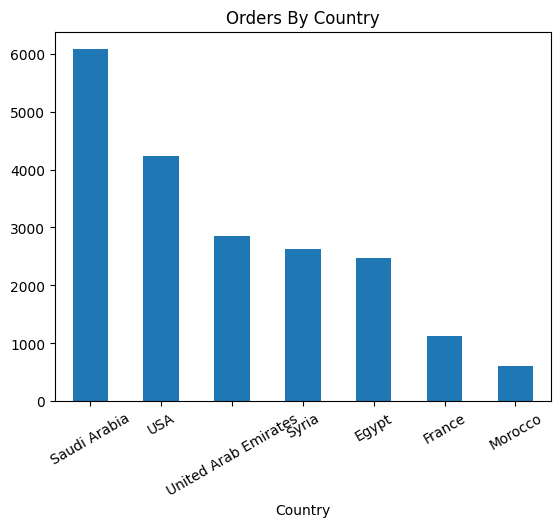

In [171]:
orders_by_countries.plot(title="Orders By Country", rot=30, kind='bar')

In [172]:
df.head()

,Order Date,Day,Country,City,First name,Last name,Full Name,Category,Sub Category,Item,Quantity,Unit Price,Discount,Price After Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,,,,
1,2023-01-01,Mon,Syria,homs,Lina,Alrrashid,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",4,999,38.361599,853.545654,891.907227,False
2,2023-01-01,Tue,Saudi Arabia,riyadh,Omar,Eurul,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,3,1199,517.968018,-215.820007,302.148010,True
3,2023-01-01,Tue,Saudi Arabia,riyadh,Iman,Iismaeil,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,4,1299,883.320007,-51.960022,831.359985,True
4,2023-01-01,Mon,United Arab Emirates,abu dhabi,Ahmad,Rihan,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,6,199,33.312599,96.236397,129.548996,True
5,2023-01-01,Wed,USA,washington,Sami,Altawil,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,4,129,11.261700,100.104004,111.365700,True


In [173]:
categories_by_totalcost = df.groupby('Category')['Total Cost'].sum()
categories_by_totalcost

Category
Digital Camera     2.527700e+06
Fitness Tracker    2.371728e+05
Gaming Console     4.944128e+05
Headphones         4.630231e+05
Laptop             2.899960e+06
Smart Speaker      3.213365e+05
Smartphone         1.364633e+06
Smartwatch         5.676672e+05
Tablet             9.346889e+05
VR Headset         1.495567e+06
Name: Total Cost, dtype: float32

<Axes: xlabel='Category', ylabel='Total Cost'>

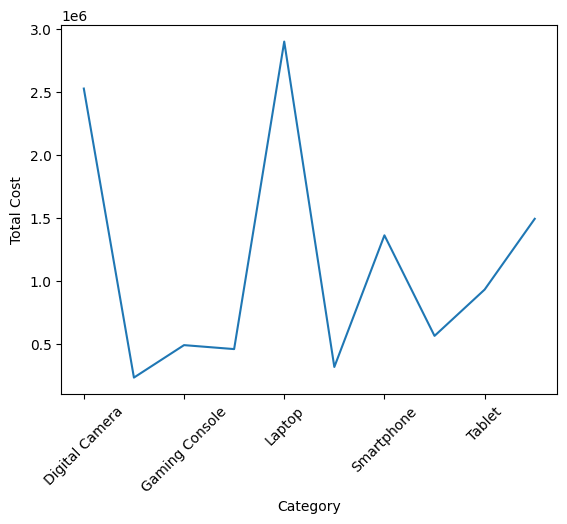

In [184]:
categories_by_totalcost.plot(rot=45, ylabel="Total Cost")

In [232]:
df.head()

,Order Date,Day,Country,City,First name,Last name,Full Name,Category,Sub Category,Item,Quantity,Unit Price,Discount,Price After Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,,,,
1,2023-01-01,Mon,Syria,homs,Lina,Alrrashid,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",4,999,38.361599,853.545654,891.907227,False
2,2023-01-01,Tue,Saudi Arabia,riyadh,Omar,Eurul,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,3,1199,517.968018,-215.820007,302.148010,True
3,2023-01-01,Tue,Saudi Arabia,riyadh,Iman,Iismaeil,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,4,1299,883.320007,-51.960022,831.359985,True
4,2023-01-01,Mon,United Arab Emirates,abu dhabi,Ahmad,Rihan,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,6,199,33.312599,96.236397,129.548996,True
5,2023-01-01,Wed,USA,washington,Sami,Altawil,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,4,129,11.261700,100.104004,111.365700,True


<Axes: ylabel='Total COst'>

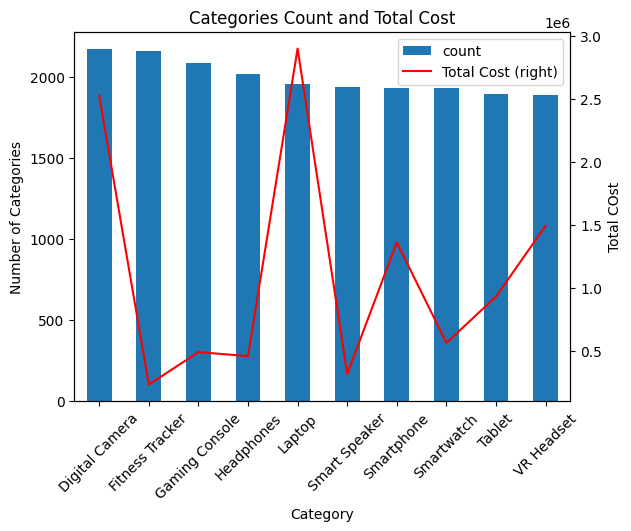

In [212]:
df['Category'].value_counts().plot(ylabel="Number of Categories", rot=45, kind='bar', legend=True, title="Categories Count and Total Cost")
categories_by_totalcost.plot(y="Total Cost", kind='line', color='r', rot=45, ylabel="Total COst", secondary_y=True, legend=True)

In [216]:
qun_totalcost_categories = df.groupby('Category')[['Quantity', 'Total Cost']].sum()
qun_totalcost_categories

,Quantity,Total Cost
Category,,
Digital Camera,8232,2.527700e+06
Fitness Tracker,7987,2.371728e+05
Gaming Console,8276,4.944128e+05
Headphones,8282,4.630231e+05
Laptop,9285,2.899960e+06
Smart Speaker,8294,3.213365e+05
Smartphone,8899,1.364633e+06
Smartwatch,8137,5.676672e+05
Tablet,9272,9.346889e+05


<Axes: ylabel='Quantity'>

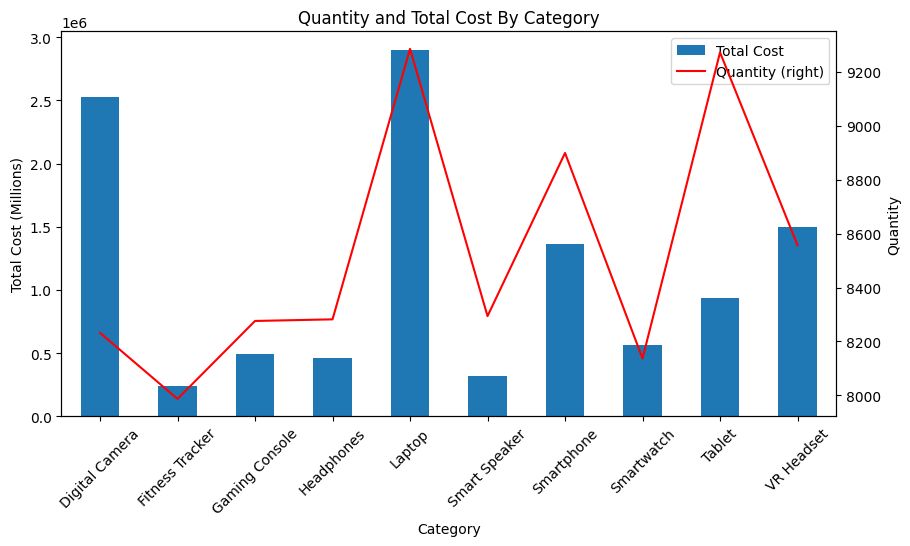

In [231]:
s_axies = qun_totalcost_categories.plot(y="Total Cost", kind='bar', ylabel="Total Cost (Millions)", title="Quantity and Total Cost By Category")
qun_totalcost_categories.plot(y="Quantity", secondary_y=True, ax=s_axies, color='r', ylabel="Quantity", rot=45, figsize=(10, 5))